<a href="https://colab.research.google.com/github/morsheduluofc/EntropyEstimation/blob/main/EntropyEstimation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Entropy Estimation of DAC Profiles:
**All Steps:**

- Step1: read all 195 profiles' data from CSV file

- Step2: install the package "entropy_estimators" to estimate entropy

- Step3: compute the entropy of each profile by using k-nearest neighbour approach

- Step4: show all estimated entropy in a graph (histogram)

**Step1: read all 195 profiles' data from CSV file**

- All users' data (both registration and verification data) are in "AllOriginalData.csv" file. There are 195 users' data and 65 features in each profile


> - Every column in the CSV file represent a feature (1st column store the ID of the user)
>- Every row is a vectore of 65 dimensions (65 features)

- Different users have different number of vectors in their profile. So, we maintain a list of indices to keep track the number of vectors in each profile and store them in "allUserIndx.csv" file.

- To represent the profile data in a table we used the panda package

In [ ]:
#Read both csv files
#Please upload the 'AllOriginalData.csv' and 'allUserIndx.csv' in a "Data" folder before run the code
import csv
with open('Data/AllOriginalData.csv') as csvfile:
    AllNProfiles = list(csv.reader(csvfile, delimiter=','))
with open('Data/allUserIndx.csv') as csvfile:
    dataIndex = list(csv.reader(csvfile, delimiter=','))
print('Read data successfully.')

Read data successfully.


In [ ]:
#print the list of indicies that track the number of vector in each profile. 
#For example: 
#  -first user's profile has 180 vectors and the index start from index 0 and end at 179
#  -second user's profile has 140 vectors and the index start from index 180 and end at 319
print(dataIndex)

[['0.0', '180.0', '320.0', '460.0', '580.0', '720.0', '860.0', '960.0', '1020.0', '1160.0', '1300.0', '1460.0', '1560.0', '1700.0', '1840.0', '1980.0', '2120.0', '2260.0', '2400.0', '2540.0', '2680.0', '2820.0', '2960.0', '3100.0', '3240.0', '3380.0', '3520.0', '3660.0', '3800.0', '3940.0', '4080.0', '4220.0', '4340.0', '4480.0', '4620.0', '4780.0', '4920.0', '5060.0', '5200.0', '5320.0', '5500.0', '5640.0', '5780.0', '5920.0', '6020.0', '6160.0', '6240.0', '6380.0', '6520.0', '6660.0', '6720.0', '6860.0', '7000.0', '7140.0', '7280.0', '7420.0', '7560.0', '7700.0', '7880.0', '8020.0', '8160.0', '8300.0', '8440.0', '8600.0', '8660.0', '8720.0', '8820.0', '8960.0', '9100.0', '9240.0', '9360.0', '9500.0', '9640.0', '9780.0', '9940.0', '10080.0', '10220.0', '10360.0', '10460.0', '10520.0', '10580.0', '10660.0', '10840.0', '10980.0', '11060.0', '11220.0', '11360.0', '11500.0', '11640.0', '11700.0', '11840.0', '11920.0', '12020.0', '12100.0', '12240.0', '12380.0', '12540.0', '12740.0', '1288

In [ ]:
# We read both csv files as the list
# Here, we will convert the list 'AllNProfiles' as a panda data frame (a table)
# Panda offer the numeric table for data manipulation and analysis
# The output show a list of profiles' data in a table
import pandas as pd

AllNProfilesData = pd.DataFrame(AllNProfiles)
AllNProfilesData=AllNProfilesData[1:] # we dropped the colums heading and set new heading 

for i in range (1,66):
  AllNProfilesData.iloc[:,i] = pd.to_numeric(AllNProfilesData.iloc[:,i], downcast="float").round(4)

Allcolumns=['ID','F1','F2','F3','F4','F5','F6','F7','F8','F9','F10','F11','F12','F13','F14','F15','F16','F17','F18','F19',
            'F20','F21','F22','F23','F24','F25','F26','F27','F28','F29','F30','F31','F32','F33','F34','F35','F36','F37','F38','F39',
            'F40','F41','F42','F43','F44','F45','F46','F47','F48','F49','F50','F51','F52','F53','F54','F55','F56','F57','F58','F59','F60',
            'F61','F62','F63','F64','F65']
AllNProfilesData.columns= Allcolumns
print(AllNProfilesData)

                   ID       F1         F2  ...  F63     F64   F65
1      A3MC5OA9RXOOFH   8.8948  15.188800  ...  1.0  0.0117   0.5
2      A3MC5OA9RXOOFH   8.1821   5.145300  ... -1.0  0.0085   8.5
3      A3MC5OA9RXOOFH   7.9351   5.439700  ... -1.0  0.0083  12.0
4      A3MC5OA9RXOOFH   4.2835   2.135400  ...  1.0  0.0139   2.0
5      A3MC5OA9RXOOFH  25.1415  14.283000  ... -1.0  0.0113   9.0
...               ...      ...        ...  ...  ...     ...   ...
25616            yash   1.9299   5.279000  ...  1.0  0.0164   1.0
25617            yash   7.8832   6.403300  ...  1.0  0.0110  13.5
25618            yash  24.5138  17.903799  ...  1.0  0.0087   4.0
25619            yash   1.9289  15.459400  ...  1.0  0.0082   4.0
25620            yash   3.6422   1.798500  ...  1.0  0.0133   3.0

[25620 rows x 66 columns]


**Step2: install the package "entropy_estimators"**

-- We used the python package "entropy_estimators" to estimate entropy of the profile.

-- It has a method "continuous.get_h()" that uses k nearest neighbor based approach to estimate the entropy

-- Package Link: https://github.com/paulbrodersen/entropy_estimators
>- Please see their example to get the idea how the entropy estimator works for multidimensional vectors


In [ ]:
#install the package "entropy_estimators"
!pip install entropy_estimators

In [ ]:
#import the estimator
import entropy_estimators

**Step3: compute entropy using the k-nearest neighbour approach**

--We used the function "continuous.get_h()" to estimate entropy. The function will take:
>- A profile X that has n, d dimentional vectors
>- The value of k of k nearest neighbor based approach (we used k=11 here)
>- The (Eucliden) norm  to measure distance between two vectors

-- For each user we take the:
>- Start index and end index of the profile
>- Divide all vectors in two groups: X for registered profile and Y for verification data
>- One can use either X or Y to estimate the entropy

In [ ]:
from entropy_estimators import continuous

AllNEntropy=[]; #Declare an empty entropy array

for i in range(0,195): #for each user the loop will continue
  #Calculate the start, end and mid index of each profile
  stindx1=int(float(dataIndex[0][i]))
  endindx1=int(float(dataIndex[0][i+1]))
  midindx=int((endindx1-stindx1)/2)
  
  #Seperate the registered profile and verification data 
  X=AllNProfilesData.iloc[stindx1:stindx1+midindx,1:66]
  #Y=AllNProfilesData.iloc[stindx1+midindx+1:endindx1,1:66]

  # compute the entropy using the k-nearest neighbour approach
  # developed by Kozachenko and Leonenko (1987).
  #The original method output the entropy in nat. We convert it to bit by multiplying 1.442695 with nat 
  Entropy = 1.442695*continuous.get_h(X, k=11, norm='euclidean') 
  Entropy=Entropy.round(2)

  #Stro all entropy as a list
  AllNEntropy.append(Entropy)

In [ ]:
#print all calculated entropy of 195 users
print(AllNEntropy)

[698.99, 618.07, 679.38, 746.81, 686.25, 719.75, 698.56, 693.52, 659.25, 722.67, 715.83, 673.01, 694.98, 748.03, 663.22, 687.49, 712.79, 712.95, 667.47, 686.23, 707.17, 765.32, 633.72, 717.82, 669.13, 665.61, 774.34, 842.4, 622.74, 679.15, 724.75, 789.48, 651.02, 692.72, 695.23, 733.5, 645.95, 721.27, 696.7, 661.64, 681.28, 708.07, 704.38, 689.65, 721.26, 669.04, 723.45, 613.57, 750.51, 680.35, 734.92, 692.42, 683.74, 661.06, 679.25, 648.34, 812.0, 765.24, 667.02, 639.99, 694.01, 714.8, 693.62, 696.41, 702.34, 707.58, 697.35, 715.57, 729.25, 648.16, 709.43, 775.93, 676.8, 680.17, 693.63, 701.22, 776.25, 738.69, 747.4, 741.76, 766.75, 707.88, 703.24, 706.14, 699.43, 741.83, 651.04, 721.58, 708.26, 759.6, 710.33, 698.14, 644.63, 630.22, 679.14, 714.23, 712.95, 752.18, 710.56, 724.89, 686.54, 675.01, 708.49, 639.32, 692.17, 728.32, 575.89, 740.31, 751.2, 705.82, 737.74, 740.48, 684.94, 590.4, 714.02, 689.51, 771.37, 643.33, 797.27, 673.33, 695.82, 653.97, 769.73, 764.83, 730.56, 743.14, 7

**Step4: show all estimated entropy in a (histogram) graph. In the graph**

-- X-axis represents the entropy in bits

-- Y-axis represent the number of profiles 


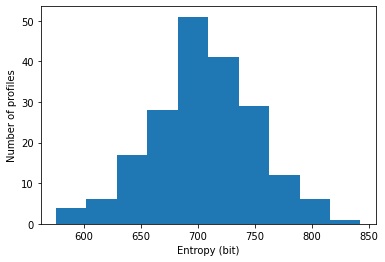

In [ ]:
# Draw a histogram
import matplotlib.pyplot as plt
plt.hist(AllNEntropy, bins = 10)
plt.xlabel('Entropy (bit)')
plt.ylabel('Number of profiles')
plt.show()